# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Nama : Hillidatul Ilmi

Batch : FTDS-012

Dataset : 

Objective : Memprediksi mengklasifikasikan kemungkinan orang terkena serangan jantung. Bandingkan antara model Decision Tree dan Random Forest. 

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [ ]:
# Mendefinisikan Libraries

!pip install feature-engine
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 22.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Menampilkan atau memproses dataset berupa CSV dari drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Menampilkan data yang akan digunakan dalam analisis atau memuat dari kumpulan data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Duplicate Data
data_copy = data.copy()

Mengandakan(duplicate) dataset nya, jika ada perubahan kolom atau atribut tetap bisa dibandingkan dengan dataset asli. Fungsi dari pengandaan agar data asli masih bisa digunakan jika ada beberapa perubahan isi dari dataset.

In [ ]:
# Mengecek ukuran dataset yang akan digunakan
print(data.shape)

(303, 14)


In [ ]:
# Melihat Nama-Nama kolom dari tabel dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Mengecek informasi dataset dari tabel dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Berdasarkan perintah data.info() bahwa tabel census_adult_income memiliki sekitar 14 kolom, dimana semua kolom teridentifikasi sebagai type integer atau kolom numerik, sebanarnya berdasarkan definisi keterangan masing-masing kolom data set yang telah dijelaskan bagian atas sebelumnya, bahwa 8 kolom adalah data kategorik dan 6 kolom adalah data numerik. Akan tetapi hal ini lebih mempermudah analisis, karena tidak perlu mengkonveksi data kategorik menjadi numerik.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


In [ ]:
eda1 = data.groupby('target').mean()[['trestbps']]
eda1 

,trestbps
target,
0,134.398551
1,129.303030


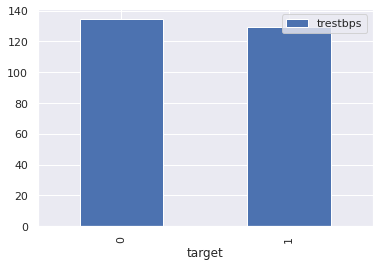

In [ ]:
sns.set_theme(style="darkgrid")
eda1.plot(kind='bar')

Berdasarkan visualisasi diagram batang di atas mengenai orang terkena serangan jantung, untuk berbagai rata-rata jumlah trestbps.
Orang lebih sedikit kemungkinan terkena serangan jatung memiliki trestbps tekanan darah rata-rata 134 ML Sedangkan Orang lebih banyak kemungkinan terkena serangan jatung memiliki trestbps tekanan darah rata-rata 129 ML.
Berdasarkan informasi secara visualisasi, Untuk pasien dengan tekanan darah rendah memiliki peluang lebih banyak terkena serangan jantung, tekanan darah yang rendah berarti tidak ada oksigen yang cukup didalam tubuh sehingga jantung tidak memompa darah dengan baik, maka lebih beresiko terkena serangan jantung. oleh karena itu pasien di harapkan mengatur pola hidup sehatnya, dari berolahraga, mengkosumsi makanan khususnya jam tidur. Jam aktivitas harus sesuai agar oksigen dalam darah berkerja dengan baik, sehingga kemungkinan terkenan serangan jantung menjadi sedikit bahkan tidak sama sekali.

In [ ]:
eda2 = data.groupby('target').mean()[['chol']]
eda2

,chol
target,
0,251.086957
1,242.230303


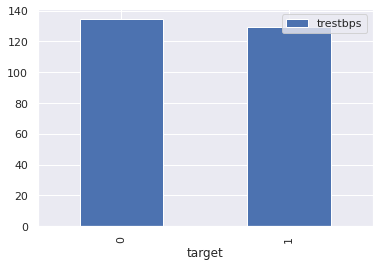

In [ ]:
sns.set_theme(style="darkgrid")
eda1.plot(kind='bar')

Berdasarkan visualisasi diagram batang di atas mengenai orang terkena serangan jantung, untuk berbagai rata-rata jumlah chol. Orang lebih sedikit kemungkinan terkena serangan jantung memiliki tes chol kolesterol badan rata-rata 251 mg/dl Sedangkan Orang lebih banyak kemungkinan terkena serangan jatung memiliki  tes chol kolesterol badan rata-rata 242 mg/dl. Berdasarkan informasi secara visualisasi, bahwa pasien harus mengontrol kolesterol yang ada dalam tubuhnya atau mengurangi konsumsi makanan yang tidak sehat lalu mengkonsumsi makanan dengan protein tinggi agar koesterol dalam badan pasien menjadi rendah, sehingga kemungkinan kecil tidak akan mengalami serangan jantung.

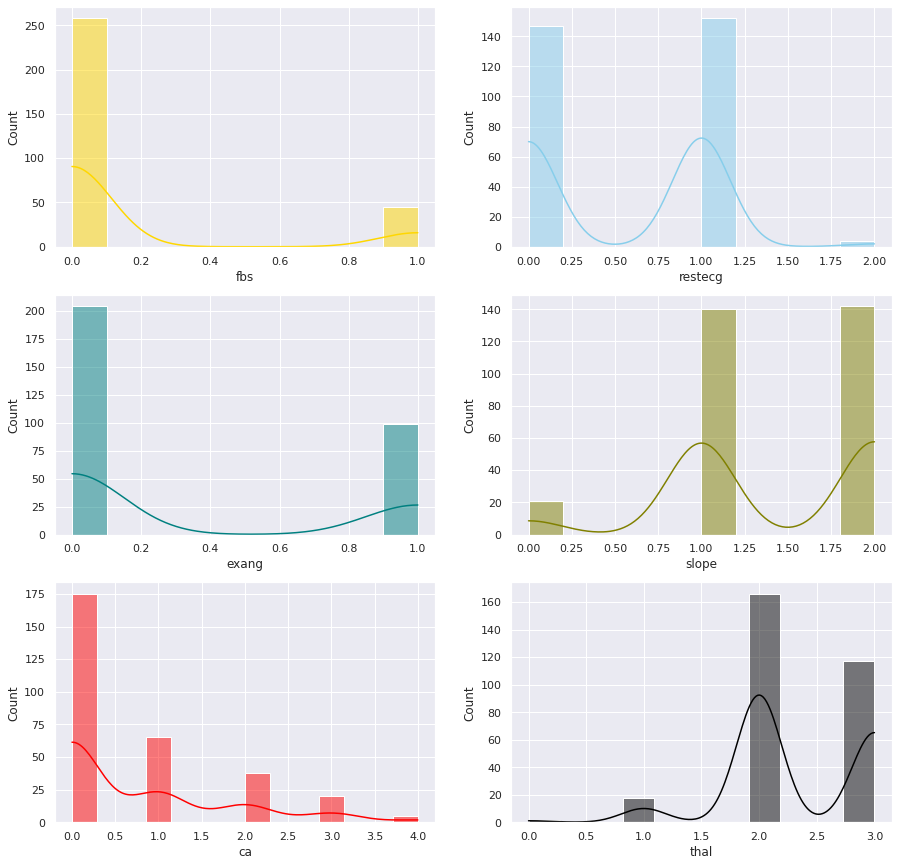

In [ ]:
# Visualisasi histogran untuk fitur berupa data kategorik
fig,axs=plt.subplots(3,2, figsize=(15,15))
sns.histplot(data=data, x='fbs', color='gold', kde=True, ax=axs[0,0])
sns.histplot(data=data, x='restecg', color='skyblue', kde=True, ax=axs[0,1])
sns.histplot(data=data, x='exang', color='teal', kde=True, ax=axs[1,0])
sns.histplot(data=data, x='slope', color='olive', kde=True, ax=axs[1,1])
sns.histplot(data=data, x='ca', color='red', kde=True, ax=axs[2,0])
sns.histplot(data=data, x='thal', color='black', kde=True, ax=axs[2,1])
plt.show()

Visualisasi Histogram

1. Data fbs, merupakan data gula darah > 120 mg/dl. Pasien lebih umum berada berada di kategori 0, yang artinya lebih sedikit terkenan serangan jantung karena memiliki gula data < 120 mg/dl. Sedangkan gula darah > 120 mg/dl berada di kategori 1, yang artinya lebih banyak terkenan serangan jantung. Berdasarkan informasi ini pasien bisa lebih memperhatihan kadar gula darah yang ada dalam dirinya.
2. Data restecg, merupakan data hasil electrocardiographic (nilai 0,1,2). Pasien lebih umum berada berada di kategori 0, yang artinya lebih sedikit terkenan serangan jantung karena memiliki hasil electrocardiographic rendah. Pasien lebih umum berada berada di kategori 1, yang artinya lebih banyak terkenan serangan jantung karena memiliki hasil electrocardiographic tinggi. Pasien lebih umum berada berada di kategori 2, yang artinya terkenan serangan jantung normal karena memiliki hasil electrocardiographic stabil.
3. Data exang, merupakan data exercise induced angina. Pasien lebih umum berada berada di kategori 0, yang artinya lebih sedikit terkenan serangan jantung karena memiliki pola olahraga yang baik. Sedangkan Pasien lebih berada berada di kategori 1, yang artinya lebih banyak terkenan serangan jantung karena memiliki pola olahraga yang urang baik. Berdasarkan informasi ini para pasien harus lebih memperhatikan pola olahraga, guna lebih membuat badan sehat sehingga kemungkinan terkena serangan jantung akan lebih rendah.
4. Data slope, merupakan ST segment. Pasien lebih umum berada berada di kategori 2, lalu di kategori 1 dan 0 Berdasarkan informasi ini para pasien harus lebih memperhatikan ST segmnet tulang mereka, guna lebih membuat badan sehat sehingga kemungkinan terkena serangan jantung akan lebih rendah.
5. Data exang, merupakan data  jumlah pembuluh darah flourosopy (0-3). Pasien lebih umum berada berada di kategori 0, yang artinya jumlah pembuluh dra flourosopy lebih umum ada di semua pasien.
6. Data thal, merupakan data thal: 0 = normal; 1 = fixed defect; 2 = reversable defect. Pasien lebih berada berada di kategori 0, yang artinya mempunyai catatan kesehatan normal. Pasien lebih umum berada berada di kategori 1, yang artinya mempunyai catatan kesehatan yang kurang baik tetap dikategorikan normal. Pasien lebih umum berada berada di kategori 2, yang artinya mempunyai catatan kesehatan reversibel atau lebih mudah terkena serangan jantung. 

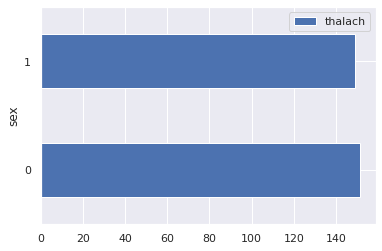

In [ ]:
data.groupby(by='sex')[['thalach']].mean().plot(kind='barh')

Thalach merupakan data detak jantung maksimum.
Berdasarkan visualisasi bahwa pasien perempuan memiliki detak jantung yang lebih rendah jika dibandingkan detak jantung maksimum laki-laki. Detak jantung mengambarkan tentang kesehatan jantung yang sedang dialami.

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## a - Data Inference

In [ ]:
# Dapatkan Data untuk Inferensi Model

datainfernce = data.sample(10, random_state=10) 
datainfernce

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0


Dari sekumpulan informasi dari dataset catatan sensus penghasilan dewasa, terdapat 10 data yang diduga tidak masuk dalam kumpulan dataset atau tetapi terdapat di bagian data inference.

In [ ]:
# Hapus Kumpulan Inferensi dari Kumpulan Data

data_train_test = data.drop(datainfernce.index)
data_train_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.shape

(303, 14)

In [ ]:
# Reset Index
# Agar tidak terjadi yang tidak diinginkan, data di reset index nya untuk keterurutan

data_train_test.reset_index(drop=True, inplace=True) 
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
1,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
2,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
3,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
4,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
5,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
6,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
7,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
8,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
9,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0


## b. - Splitting Dataset


In [ ]:
# Pemisahan `X` (Fitur) dan `y` (Target)

X = data_train_test.drop('target', axis=1) 
y = data_train_test['target']

In [ ]:
# Split between Train-Set and Test-Set

# Memasukkan nilai x dan y, test_size artinya split 80% untuk train, dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (234, 13)
Test Size :  (59, 13)


## c - Feature Selection

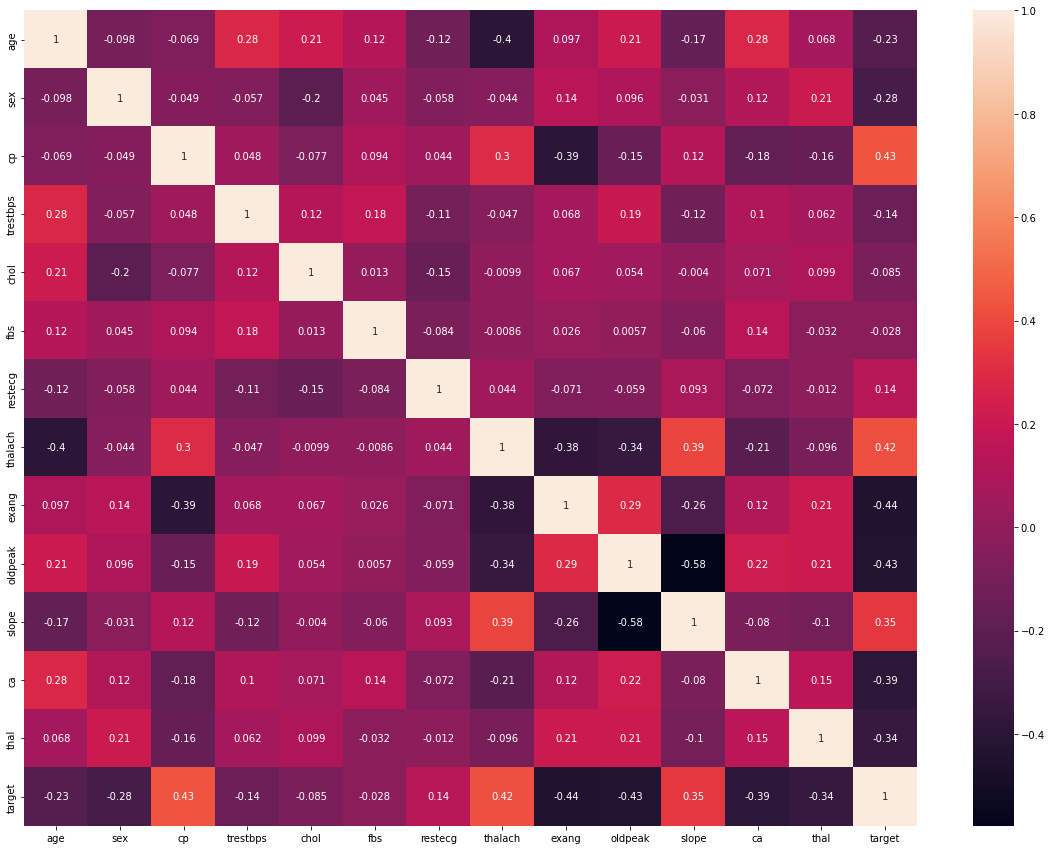

In [ ]:
# Melihat Korelasi antara Fitur
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# create the classifier with n_estimators = 100
selectionFitur = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
selectionFitur.fit(X_train, y_train)
# view the feature scores
score_fitur = pd.Series(selectionFitur.feature_importances_, index=X_train.columns).sort_values(ascending=False)
score_fitur

cp          0.132471
thalach     0.130746
ca          0.113543
thal        0.107260
oldpeak     0.103209
trestbps    0.081378
age         0.076736
chol        0.074085
exang       0.069119
slope       0.043299
sex         0.033816
restecg     0.024473
fbs         0.009864
dtype: float64

Berdasarkan feature selection menggunakan feature_importances, saya akan menggunakan 4 fitur ynag memiliki score tinggi, yaitu fitur cp, thalach, ca dan thal, yang diduga mempengaruhi penyakit serangan jantung.

In [ ]:
X_train.drop(['oldpeak','trestbps', 'age', 'chol', 'exang', 'slope', 'sex', 'restecg', 'fbs'], axis=1, inplace=True)
X_test.drop(['oldpeak','trestbps', 'age', 'chol', 'exang', 'slope', 'sex', 'restecg', 'fbs'], axis=1, inplace=True)

Fitur yang dengan score rendah tidak akan digunakan untuk memprediksi target penyakit jantung.

## d - Handling Missing Value


In [ ]:
# Mengecek Missing Values on X_train
X_train.isnull().sum()

cp         0
thalach    0
ca         0
thal       0
dtype: int64

In [ ]:
# Mengecek Missing Values on X_train
X_test.isnull().sum()

cp         0
thalach    0
ca         0
thal       0
dtype: int64

In [ ]:
# Mengecek Missing Values on X_train
y_train.isnull().sum()

0

In [ ]:
# Mengecek Missing Values on X_train
y_test.isnull().sum()

0

Setelah di lakukan proses handling missing value maka variabel X_train, X_test, y_train dan y_test bahwa tidak terdapat missing value yang artinya sudah bersih dari Nan data. Selanjutnya akan dilakukan handling outlier.

## e - Handling Outlier

In [ ]:
# Berfungsi untuk membuat histogram dan boxplot.
def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

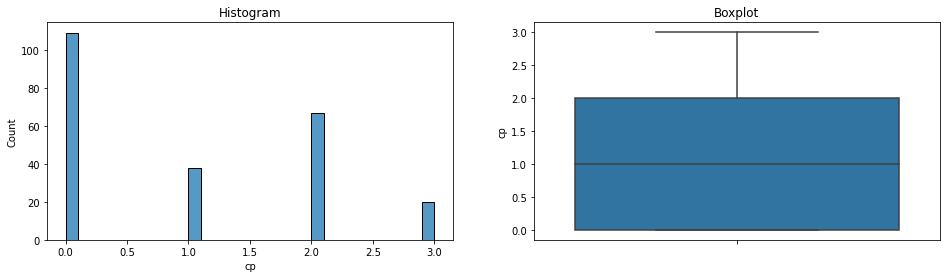


Skewness Value cp :  0.46825375660663604


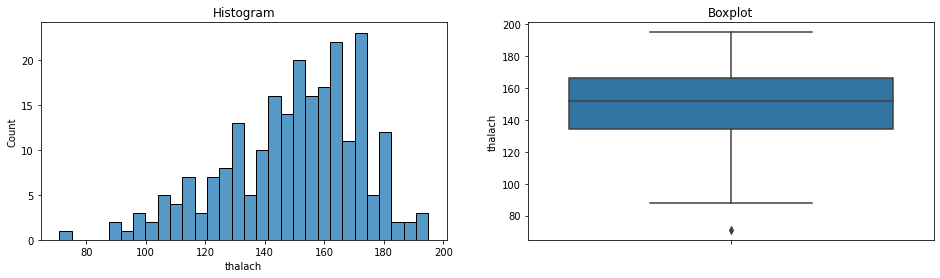


Skewness Value thalach :  -0.6143719936387718


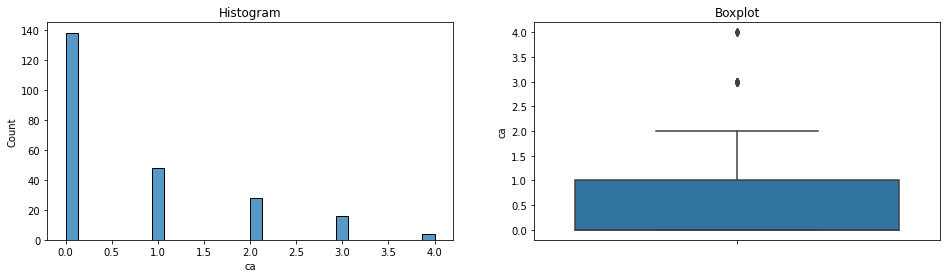


Skewness Value ca :  1.3475992523573745


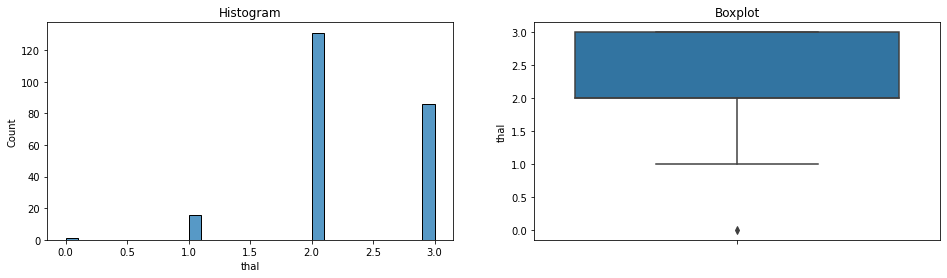


Skewness Value thal :  -0.36382561983904504


In [ ]:
# Mengecek Distribusi fitur dan outlier menggunakan Boxplot

diagnostic_plots(X_train, 'cp')
print('\nSkewness Value cp : ', X_train['cp'].skew())

diagnostic_plots(X_train, 'thalach')
print('\nSkewness Value thalach : ', X_train['thalach'].skew())

diagnostic_plots(X_train, 'ca')
print('\nSkewness Value ca : ', X_train['ca'].skew())

diagnostic_plots(X_train, 'thal')
print('\nSkewness Value thal : ', X_train['thal'].skew())

Berdasarkan hasil pengecekan outlier bahwa fitur cp tidak memiliki data yang outlier, sedangkan fitur thalach, ca dan thal terdapat data yang outlier. oleh karena itu akan dilakukan handling outlier.

In [ ]:
X_train_ = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=1.5,
                          variables=['thalach','ca','thal'])
X_train_.fit(X_train)
X_trainn = X_train_.transform(X_train) 

In [ ]:
# Pemeriksaan perbandingan data outlier sebelum dan sesudah
# Periksa batas minimum untuk setiap variabel
print('Left Tail Caps  : ', X_train_.left_tail_caps_)
print('           ')
# Periksa batas maksimum untuk setiap variabel
print('Right Tail Caps : ', X_train_.right_tail_caps_)

Left Tail Caps  :  {'thalach': 87.25, 'ca': -1.5, 'thal': 0.5}
           
Right Tail Caps :  {'thalach': 213.25, 'ca': 2.5, 'thal': 4.5}



cp - Setelah Handling Outlier Capping

Skewness Value cp :  0.46825375660663604


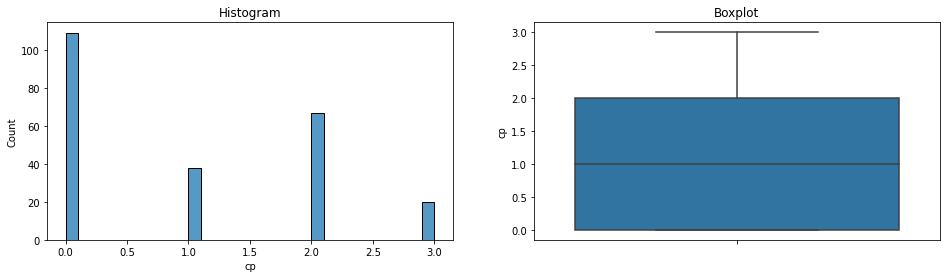


thalach - Setelah Handling Outlier Capping

Skewness Value thalach :  -0.5517214922777717


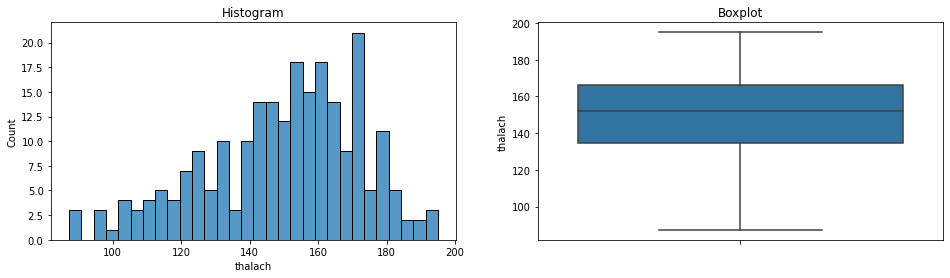


ca - Setelah Handling Outlier Capping

Skewness Value ca :  0.9601479458232297


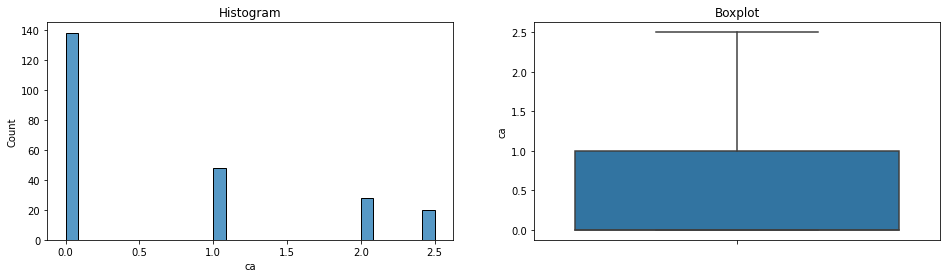


thal - Setelah Handling Outlier Capping

Skewness Value thal :  -0.2628024015792428


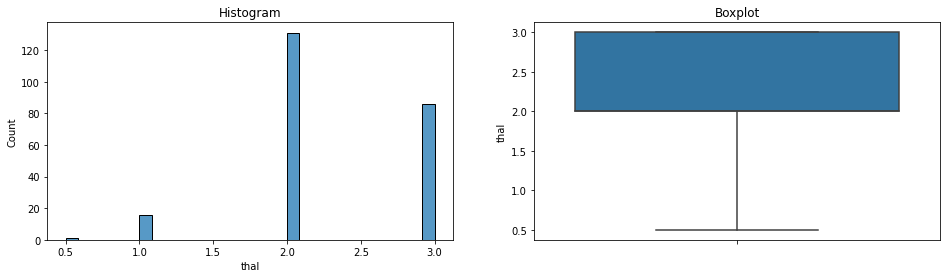

In [ ]:
# Visualisasi Setelah Handling Outlier
print('\ncp - Setelah Handling Outlier Capping')
print('\nSkewness Value cp : ', X_trainn['cp'].skew())
diagnostic_plots(X_trainn, 'cp')

print('\nthalach - Setelah Handling Outlier Capping')
print('\nSkewness Value thalach : ', X_trainn['thalach'].skew())
diagnostic_plots(X_trainn, 'thalach')

print('\nca - Setelah Handling Outlier Capping')
print('\nSkewness Value ca : ', X_trainn['ca'].skew())
diagnostic_plots(X_trainn, 'ca')

print('\nthal - Setelah Handling Outlier Capping')
print('\nSkewness Value thal : ', X_trainn['thal'].skew())
diagnostic_plots(X_trainn, 'thal')

In [ ]:
# DIPEROLEH X_train YANG SUDAH DI LAKUKAN DATA CLEANING/FEATURE ENGINEERING
# Variabel X_train_clear sudah bersih dari Missing Value dan Outlier
X_trainn

,cp,thalach,ca,thal
175,0,132.0,1.0,3.0
213,0,111.0,0.0,3.0
10,2,139.0,0.0,2.0
87,0,122.0,0.0,2.0
152,2,179.0,0.0,2.0
...,...,...,...,...
156,1,169.0,0.0,2.0
123,1,192.0,0.0,2.0
15,2,172.0,0.0,2.0
125,2,169.0,0.0,2.0


In [ ]:
X_trainn.cp.value_counts()

0    109
2     67
1     38
3     20
Name: cp, dtype: int64

In [ ]:
X_trainn.ca.value_counts()

0.0    138
1.0     48
2.0     28
2.5     20
Name: ca, dtype: int64

In [ ]:
X_trainn.thal.value_counts()

2.0    131
3.0     86
1.0     16
0.5      1
Name: thal, dtype: int64

In [ ]:
X_trainn.thalach.value_counts()

162.0    8
173.0    8
152.0    8
172.0    7
160.0    7
        ..
120.0    1
195.0    1
99.0     1
181.0    1
192.0    1
Name: thalach, Length: 83, dtype: int64

Berdasarkan unique value, fitur cp, ca dan thal adalah data kategorik dan fitur thalach adalah data numerik.

## f - Pemisahan Fitur numerik dan kategorik

In [ ]:
num_col=['thalach']
cat_col=['cp','ca','thal']

In [ ]:
pre=ColumnTransformer([('num',MinMaxScaler(),num_col),
                    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_col)
])

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Decision Tree

In [ ]:
pipeDT=Pipeline([('DTsacler',pre), ('DTC',DecisionTreeClassifier())])

In [ ]:
kf=KFold(n_splits=5)
scoresDT = cross_val_score(pipeDT, X_trainn, y_train, cv=kf)
print("--Decision Tree--")
print("Cross Validation array           :",scoresDT)
print("Best Cross Validation score      :",scoresDT.mean())
print("Standar Deviasi Cross Validation :",scoresDT.std())

--Decision Tree--
Cross Validation array           : [0.85106383 0.80851064 0.78723404 0.63829787 0.67391304]
Best Cross Validation score      : 0.7518038852913967
Standar Deviasi Cross Validation : 0.08157706378123035


Decison tree memiliki nilai cross validation sebesar 75,18%.

## Random Forest

In [ ]:
# pipeline randomforest
pipeRF = Pipeline([("RFsacler",pre), ("RFC",RandomForestClassifier())])

In [ ]:
kf=KFold(n_splits=5)
scoresRF = cross_val_score(pipeRF, X_trainn, y_train, cv=kf)
print("--Random Forest--")
print("Cross Validation array           :",scoresRF)
print("Best Cross Validation score      :",scoresRF.mean())
print("Standar Deviasi Cross Validation :",scoresRF.std())

--Random Forest--
Cross Validation array           : [0.85106383 0.85106383 0.87234043 0.72340426 0.69565217]
Best Cross Validation score      : 0.798704902867715
Standar Deviasi Cross Validation : 0.07374978931576054


Decison tree memiliki nilai cross validation sebesar 79,87%.

Berdasarkan best cross validation bahwa algoritma Random Forest lebih baik dengan CV sebesar 79,87% sedangkan decision tree memiliki nilai CV sebesar 75,8%. Tetapi keduanya tetap di cari hyperparameter terbaik, maksimal 2 hyperparameter dan 2 set values masing-masing hyperparameter.

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Decision Tree

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_DT = pipeDT.fit(X_trainn,y_train)
model_DT

Pipeline(steps=[('DTsacler',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['thalach']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'ca', 'thal'])])),
                ('DTC', DecisionTreeClassifier())])

In [ ]:
param_grid_DT = {'DTC__max_depth' : [1,2,3,4],
                 'DTC__min_samples_split' : [1,2,3,4]}

In [ ]:
gridDT = GridSearchCV(pipeDT, param_grid_DT, cv=5)
gridDT.fit(X_trainn,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('DTsacler',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['thalach']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['cp',
                                                                          'ca',
                                                                          'thal'])])),
                                       ('DTC', DecisionTreeClassifier())]),
             param_grid={'DTC__max_depth': [1, 2, 3, 4],
                         'DTC__min_samples_split': [1, 2, 3, 4]})

In [ ]:
model_DT_gridsearchCV = gridDT.best_estimator_
model_DT_gridsearchCV

Pipeline(steps=[('DTsacler',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['thalach']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'ca', 'thal'])])),
                ('DTC', DecisionTreeClassifier(max_depth=3))])

In [ ]:
scoresDT = cross_val_score(model_DT_gridsearchCV, X_trainn, y_train, cv=5)
print("Cross Validation Score model_DT_gridsearchCV array     :",scoresDT)
print("Best Cross Validation Score model_DT_gridsearchCV      : {:.2f}".format(gridDT.best_score_))
print("Standar Deviasi Cross Validation model_DT_gridsearchCV : {:.2f}".format(gridDT.best_score_.std()))

Cross Validation Score model_DT_gridsearchCV array     : [0.85106383 0.87234043 0.76595745 0.82978723 0.67391304]
Best Cross Validation Score model_DT_gridsearchCV      : 0.80
Standar Deviasi Cross Validation model_DT_gridsearchCV : 0.00


Best estimator Decision Tree sebelum menggunakan parameter terbaik mempunyai nilai CV sebesar 80% dan jika tidak menggunakan estimator mempunyai nilai CV sebesar 75,18%. Estimator terbaik parameter decison tree adalah max_depth=3.


## Random Forest

In [ ]:
model_RF = pipeRF.fit(X_trainn,y_train)
model_RF

Pipeline(steps=[('RFsacler',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['thalach']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'ca', 'thal'])])),
                ('RFC', RandomForestClassifier())])

In [ ]:
param_grid_RF = {'RFC__n_estimators' : [1,5,10,100],
                 'RFC__max_depth' : [1,2,3,4]}

In [ ]:
gridRF = GridSearchCV(pipeRF, param_grid_RF, cv=5)
gridRF.fit(X_trainn,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RFsacler',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['thalach']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['cp',
                                                                          'ca',
                                                                          'thal'])])),
                                       ('RFC', RandomForestClassifier())]),
             param_grid={'RFC__max_depth': [1, 2, 3, 4],
                         'RFC__n_estimators': [1, 5, 10, 100]})

In [ ]:
model_RF_gridsearchCV = gridRF.best_estimator_
model_RF_gridsearchCV

Pipeline(steps=[('RFsacler',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['thalach']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'ca', 'thal'])])),
                ('RFC', RandomForestClassifier(max_depth=3))])

In [ ]:
scoresRF = cross_val_score(model_RF_gridsearchCV, X_trainn, y_train, cv=5)
print("Cross Validation Score model_RF_gridsearchCV array     :",scoresRF)
print("Best Cross Validation Score model_RF_gridsearchCV      : {:.2f}".format(gridRF.best_score_))
print("Standar Deviasi Cross Validation model_RF_gridsearchCV : {:.2f}".format(gridRF.best_score_.std()))

Cross Validation Score model_RF_gridsearchCV array     : [0.85106383 0.91489362 0.74468085 0.87234043 0.7173913 ]
Best Cross Validation Score model_RF_gridsearchCV      : 0.84
Standar Deviasi Cross Validation model_RF_gridsearchCV : 0.00


Best estimator Random Forest sebelum menggunakan parameter terbaik mempunyai nilai CV sebesar 84% dan jika tidak menggunakan estimator mempunyai nilai CV sebesar 79,87%. Estimator terbaik parameter Random Forest adalah max_depth=3.

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Decision Tree

In [ ]:
y_pred_train_DTC = model_DT.predict(X_trainn)
y_pred_test_DTC = model_DT.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_DTC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_DTC))

accuracy score train :  0.9700854700854701
accuracy score test :  0.7627118644067796


In [ ]:
y_pred_train_DT_gridsearchCV = model_RF_gridsearchCV.predict(X_trainn)
y_pred_test_DT_gridsearchCV = model_RF_gridsearchCV.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_DT_gridsearchCV))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_DT_gridsearchCV))

accuracy score train :  0.8675213675213675
accuracy score test :  0.847457627118644


Ketepatan atau akurasi model decision tree tanpa estimator terbaik memiliki nilai training sebesar 97% dan testing sebesar 76%, artinya masih di kategorikan uderfit, karena rentang nilai nya jauh berbeda. Sedangkan Ketepatan atau akurasi model decision tree menggunakan estimator terbaik max_depth=3 memiliki nilai training sebesar 86% dan testing sebesar 84%, artinya masih di kategorikan goodfit, dimana model decision tree ini akan bisa memprediksi penyakit jantung dengan baik.

confusion matrix Decision Tree Train Set


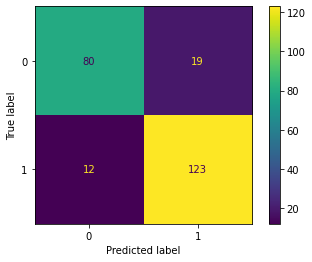

                                           
confusion matrix Decision Tree Test Set


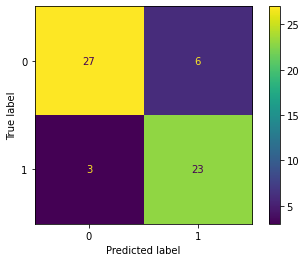

In [ ]:
print('confusion matrix Decision Tree Train Set')
dt = confusion_matrix(y_train,y_pred_train_DT_gridsearchCV, labels=model_RF_gridsearchCV.classes_)
dispdt = ConfusionMatrixDisplay(confusion_matrix=dt,display_labels=model_RF_gridsearchCV.classes_)
dispdt.plot()
plt.show()
print('                                           ')
print('confusion matrix Decision Tree Test Set')
dt2 = confusion_matrix(y_test,y_pred_test_DT_gridsearchCV, labels=model_RF_gridsearchCV.classes_)
dispdt2 = ConfusionMatrixDisplay(confusion_matrix=dt2,display_labels=model_RF_gridsearchCV.classes_)
dispdt2.plot()
plt.show()

Confusion Matrix X_train. Nilai 80 adalah banyaknya data hasil prediksi penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya serangan jantung kategori benar. Nilai 19 adalah penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 12 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 123 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung  dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

Confusion Matrix X_test. Nilai 27 adalah banyaknya data hasil prediksi penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya serangan jantung kategori benar. Nilai 6 adalah penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 3 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 23 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung  dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

In [ ]:
print('classification report Decision Tree Train Set')
print(classification_report(y_train,y_pred_train_DT_gridsearchCV))
print('                                  ')
print('classification report Decision Tree Test Set')
print(classification_report(y_test,y_pred_test_DT_gridsearchCV))

classification report Decision Tree Train Set
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        99
           1       0.87      0.91      0.89       135

    accuracy                           0.87       234
   macro avg       0.87      0.86      0.86       234
weighted avg       0.87      0.87      0.87       234

                                  
classification report Decision Tree Test Set
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.79      0.88      0.84        26

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



Classification report y_train. Recall 0 dari pasien yang lebih sedikit terkena serangan jantung memang benar dengan banyaknya data yang sebenarnya positif atau terkena penyakit jantung dengan data sebesar 0,81. Recall 1  dari pasien yang lebih banyak terkena serangan jantung masuk memang benar dengan banyaknya data yang sebenarnya positif atau terkenan penyakit serangan jantung dengan data sebesar 0,91.

Classification report y_train. Recall 0 dari pasien yang lebih sedikit terkena serangan jantung memang benar dengan banyaknya data yang sebenarnya positif atau terkena penyakit jantung dengan data sebesar 0,82. Recall 1  dari pasien yang lebih banyak terkena serangan jantung masuk memang benar dengan banyaknya data yang sebenarnya positif atau terkenan penyakit serangan jantung dengan data sebesar 0,88.

## Random Forest

In [ ]:
y_pred_train_RFC = model_RF.predict(X_trainn)
y_pred_test_RFC = model_RF.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RFC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RFC))

accuracy score train :  0.9658119658119658
accuracy score test :  0.7627118644067796


In [ ]:
y_pred_train_RF_gridsearchCV = model_RF_gridsearchCV.predict(X_trainn)
y_pred_test_RF_gridsearchCV = model_RF_gridsearchCV.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RF_gridsearchCV))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RF_gridsearchCV))

accuracy score train :  0.8675213675213675
accuracy score test :  0.847457627118644


Ketepatan atau akurasi model Random Forest tanpa estimator terbaik memiliki nilai training sebesar 96% dan testing sebesar 76%, artinya masih di kategorikan uderfit, karena rentang nilai nya jauh berbeda. Sedangkan Ketepatan atau akurasi model Random Forest menggunakan estimator terbaik max_depth=3 memiliki nilai training sebesar 86% dan testing sebesar 84%, artinya masih di kategorikan goodfit, dimana model Random Forest ini akan bisa memprediksi penyakit jantung dengan baik.

confusion matrix Random Forest Train Set


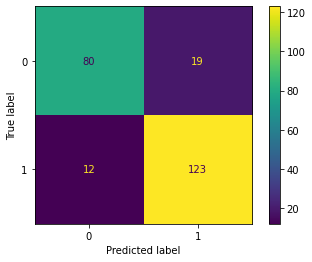

                                           
confusion matrix Random Forest Test Set


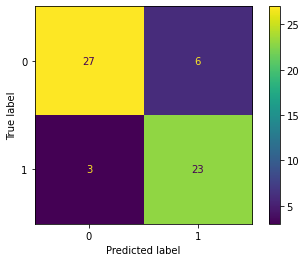

In [ ]:
print('confusion matrix Random Forest Train Set')
rf = confusion_matrix(y_train,y_pred_train_RF_gridsearchCV, labels=model_RF_gridsearchCV.classes_)
disprf = ConfusionMatrixDisplay(confusion_matrix=rf,display_labels=model_RF_gridsearchCV.classes_)
disprf.plot()
plt.show()
print('                                           ')
print('confusion matrix Random Forest Test Set')
rf2 = confusion_matrix(y_test,y_pred_test_RF_gridsearchCV, labels=model_RF_gridsearchCV.classes_)
disprf2 = ConfusionMatrixDisplay(confusion_matrix=rf2,display_labels=model_RF_gridsearchCV.classes_)
disprf2.plot()
plt.show()

Confusion Matrix X_train. Nilai 80 adalah banyaknya data hasil prediksi penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya serangan jantung kategori benar. Nilai 19 adalah penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 12 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 123 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung  dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

Confusion Matrix X_test. Nilai 27 adalah banyaknya data hasil prediksi penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya serangan jantung kategori benar. Nilai 6 adalah penyakit jantung yang masuk kategori lebih sedikit terkenan serangan jantung kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori salah tetapi terdeteksi benar. Nilai 3 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar tetapi terdeteksi salah. Nilai 23 adalah prediksi penyakit jantung yang masuk kategori lebih banyak terkenan serangan jantung  dan kenyataan pada data observasi sesungguhnya nilai tersebut merupakan kategori benar salah.

Berdasarkan Confusion Matrix bahwa algoritma Decision Tree dan Random Forest memprediksi dengan nilai yang sama.

In [ ]:
print('classification report Random Forest Train Set')
print(classification_report(y_train,y_pred_train_RF_gridsearchCV))
print('                                  ')
print('classification report Random Forest Test Set')
print(classification_report(y_test,y_pred_test_RF_gridsearchCV))

classification report Random Forest Train Set
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        99
           1       0.87      0.91      0.89       135

    accuracy                           0.87       234
   macro avg       0.87      0.86      0.86       234
weighted avg       0.87      0.87      0.87       234

                                  
classification report Random Forest Test Set
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.79      0.88      0.84        26

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



Classification report y_train. Recall 0 dari pasien yang lebih sedikit terkena serangan jantung memang benar dengan banyaknya data yang sebenarnya positif atau terkena penyakit jantung dengan data sebesar 0,81. Recall 1  dari pasien yang lebih banyak terkena serangan jantung masuk memang benar dengan banyaknya data yang sebenarnya positif atau terkenan penyakit serangan jantung dengan data sebesar 0,91.

Classification report y_train. Recall 0 dari pasien yang lebih sedikit terkena serangan jantung memang benar dengan banyaknya data yang sebenarnya positif atau terkena penyakit jantung dengan data sebesar 0,82. Recall 1  dari pasien yang lebih banyak terkena serangan jantung masuk memang benar dengan banyaknya data yang sebenarnya positif atau terkenan penyakit serangan jantung dengan data sebesar 0,88.

Berdasarkan Classification report bahwa algoritma Decision Tree dan Random Forest memprediksi dengan nilai yang sama.

# 9 - Model Inference

## a - Loading Data Inference

In [ ]:
# Sebelum inference kita tampilkan dulu data inference yang di awal
datainfernce

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
1,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
2,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
3,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
4,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
5,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
6,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
7,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
8,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
9,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0


In [ ]:
datainferncefin=datainfernce[['cp','thalach','ca','thal']]
datainferncefin

,cp,thalach,ca,thal
0,0,150,2,3
1,2,165,1,3
2,2,131,0,3
3,0,143,0,2
4,0,128,0,3
5,2,187,0,2
6,0,159,1,2
7,2,155,0,2
8,1,162,0,2
9,0,114,0,3


## b - Model Inference Decision Tree

In [ ]:
# Predict using Linear Regression untuk data inference
y_pred_inf_DT = model_DT_gridsearchCV.predict(datainferncefin)
y_pred_inf_DT_fin = pd.DataFrame(y_pred_train_DT_gridsearchCV , columns=['Pred-DT-Taget'])
y_pred_inf_DT_fin 

,Pred-DT-Taget
0,0
1,0
2,1
3,1
4,1
...,...
229,1
230,1
231,1
232,1


## c - Model Inference Random Forest

In [ ]:
# Predict using Random Forest untuk data inference
y_pred_inf_RF = model_RF_gridsearchCV.predict(datainferncefin)
y_pred_inf_RFC_fin = pd.DataFrame(y_pred_train_RF_gridsearchCV, columns=['Pred-RF-Target'])
y_pred_inf_RFC_fin 

,Pred-RF-Target
0,0
1,0
2,1
3,1
4,1
...,...
229,1
230,1
231,1
232,1


## j - Model Inference Algorithm

In [ ]:
# Merge/mengabungkan data scaling/encoder dengan prediksi peringkat nya
datainfernceF=datainfernce[['cp','thalach','ca','thal','target']]
pd.concat([datainfernceF,y_pred_inf_DT_fin ,y_pred_inf_RFC_fin,], axis=1)

,cp,thalach,ca,thal,target,Pred-DT-Taget,Pred-RF-Target
0,0.0,150.0,2.0,3.0,0.0,0,0
1,2.0,165.0,1.0,3.0,0.0,0,0
2,2.0,131.0,0.0,3.0,0.0,1,1
3,0.0,143.0,0.0,2.0,1.0,1,1
4,0.0,128.0,0.0,3.0,0.0,1,1
...,...,...,...,...,...,...,...
229,NaN,NaN,NaN,NaN,NaN,1,1
230,NaN,NaN,NaN,NaN,NaN,1,1
231,NaN,NaN,NaN,NaN,NaN,1,1
232,NaN,NaN,NaN,NaN,NaN,1,1


# 10 - Pengambilan Kesimpulan

Memprediksi penyakit jantung. Saya telah melakuan analisis mengenai hubungan antara fitur(terget/y) yang jenis data berbentuk kategorik yaitu pendapatan 0 lebih sedikit terkena serangan jantung dan 1 lebih banyak banyak terkenan serangan jantung, terhadap variabel (fitur/X) berupa thalach, cp, ca dan thal. Dalam Kasus ini, dilakukan pendekatan analisis menggunakan Exploratory Data Analysis (EDA),Decision Tree dan Random Forest.

---
**Exploratory Data Analysis (EDA)**
Berdasarkan informasi secara visualisasi, Untuk pasien dengan tekanan darah rendah memiliki peluang lebih banyak terkena serangan jantung, tekanan darah yang rendah berarti tidak ada oksigen yang cukup didalam tubuh sehingga jantung tidak memompa darah dengan baik, maka lebih beresiko terkena serangan jantung. oleh karena itu pasien di harapkan mengatur pola hidup sehatnya, dari berolahraga, mengkosumsi makanan khususnya jam tidur. Jam aktivitas harus sesuai agar oksigen dalam darah berkerja dengan baik, sehingga kemungkinan terkenan serangan jantung menjadi sedikit bahkan tidak sama sekali.

Berdasarkan informasi secara visualisasi, bahwa pasien harus mengontrol kolesterol yang ada dalam tubuhnya atau mengurangi konsumsi makanan yang tidak sehat lalu mengkonsumsi makanan dengan protein tinggi agar koesterol dalam badan pasien menjadi rendah, sehingga kemungkinan kecil tidak akan mengalami serangan jantung.

Berdasarkan visualisasi bahwa pasien perempuan memiliki detak jantung yang lebih rendah jika dibandingkan detak jantung maksimum laki-laki. Detak jantung mengambarkan tentang kesehatan jantung yang sedang dialami.

---
**Decision Tree**

Best estimator Decision Tree sebelum menggunakan parameter terbaik mempunyai nilai CV sebesar 80% dan jika tidak menggunakan estimator mempunyai nilai CV sebesar 75,18%. Estimator terbaik parameter decison tree adalah max_depth=3.

Ketepatan atau akurasi model decision tree tanpa estimator terbaik memiliki nilai training sebesar 97% dan testing sebesar 76%, artinya masih di kategorikan uderfit, karena rentang nilai nya jauh berbeda. Sedangkan Ketepatan atau akurasi model decision tree menggunakan estimator terbaik max_depth=3 memiliki nilai training sebesar 86% dan testing sebesar 84%, artinya masih di kategorikan goodfit, dimana model decision tree ini akan bisa memprediksi penyakit jantung dengan baik.

---
**Random Forest**

Best estimator Random Forest sebelum menggunakan parameter terbaik mempunyai nilai CV sebesar 84% dan jika tidak menggunakan estimator mempunyai nilai CV sebesar 79,87%. Estimator terbaik parameter Random Forest adalah max_depth=3.

Ketepatan atau akurasi model Random Forest tanpa estimator terbaik memiliki nilai training sebesar 96% dan testing sebesar 76%, artinya masih di kategorikan uderfit, karena rentang nilai nya jauh berbeda. Sedangkan Ketepatan atau akurasi model Random Forest menggunakan estimator terbaik max_depth=3 memiliki nilai training sebesar 86% dan testing sebesar 84%, artinya masih di kategorikan goodfit, dimana model Random Forest ini akan bisa memprediksi penyakit jantung dengan baik

